<a href="https://colab.research.google.com/github/mrklees/PracticalStatistics/blob/master/Statistical_Testing_%26_p_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Statistical Testing & p-values

### Don't Forget to Run All (Ctrl+F9)
### Alex! Press the Record Button!!!


By the end of the session participants will...

* Review the ideas of expectation and variance and place in the context of the sample versus the population
* Learn a new way to express both expectation and variance in the form of confidence intervals
* Be introduced to the idea of statistical inference, and will get some initial exposure to statistical testing and p-values.
* Learn about the limitations of p-values and about the nuance in evidence

## Reviewing some Language

**Expected Value: ** This is the average! It's the long-run average value of repetitions of the same experiment.

**Variance:** This is a measure of how spread out a distribution is from its mean.  The greater the variance, the futher values fall from its mean.  We will properly define this term today.  

In [0]:
#@title Imports and Global Variables (run this cell first)  { display-mode: "form" }
#@markdown This sets the warning status (default is `ignore`, since this notebook runs correctly)
warning_status = "ignore" #@param ["ignore", "always", "module", "once", "default", "error"]
import warnings
warnings.filterwarnings(warning_status)
with warnings.catch_warnings():
    warnings.filterwarnings(warning_status, category=DeprecationWarning)
    warnings.filterwarnings(warning_status, category=UserWarning)

import numpy as np
import pandas as pd
import os
#@markdown This sets the styles of the plotting (default is styled like plots from [FiveThirtyeight.com](https://fivethirtyeight.com/))
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
%matplotlib inline
import seaborn as sns; sns.set_context('notebook')

In [0]:
#@title Read the Data from the Web
data_url = 'https://impactblob.blob.core.windows.net/public/anon_hmh.csv'
data = pd.read_csv(data_url)
data.head()

,GRADE_ID_NUMERIC,OFFICIALFLLIT,OFFICIALFLMTH,FL_LIT_MET_DOSAGE,FL_MTH_MET_DOSAGE,litassess_pre_value_num,LITASSESS_RAWCHANGE,LITASSESS_SRITARGET,mathassess_pre_value_num,MathAssess_RAWCHANGE,SMI_TARGET,AnonId,SiteId,SchoolId,att_pre_value,att_post_value
0,7,0,0,NaN,NaN,NaN,NaN,NaN,505.0,130.0,150.0,2634048971,1,59,NaN,NaN
1,7,0,0,NaN,NaN,NaN,NaN,NaN,505.0,290.0,150.0,2405496161,1,59,NaN,NaN
2,7,0,0,NaN,NaN,NaN,NaN,NaN,610.0,305.0,150.0,2627617999,1,59,NaN,NaN
3,8,0,0,NaN,NaN,NaN,NaN,NaN,695.0,135.0,150.0,1437215014,1,59,NaN,NaN
4,8,0,0,NaN,NaN,NaN,NaN,NaN,610.0,75.0,150.0,461103962,1,59,NaN,NaN


In [0]:
#@title Let's take a look at some descriptive statisitics
def describe_nulls(data):
    desc = data.describe(include=data.dtypes.unique())
    desc.loc['% Null'] = data.isna().sum() / data.shape[0]
    return desc
describe_nulls(data)

,GRADE_ID_NUMERIC,OFFICIALFLLIT,OFFICIALFLMTH,FL_LIT_MET_DOSAGE,FL_MTH_MET_DOSAGE,litassess_pre_value_num,LITASSESS_RAWCHANGE,LITASSESS_SRITARGET,mathassess_pre_value_num,MathAssess_RAWCHANGE,SMI_TARGET,AnonId,SiteId,SchoolId,att_pre_value,att_post_value
count,6620.000000,6620.000000,6620.000000,2651.000000,2784.000000,4478.000000,3762.000000,4123.000000,4633.000000,3879.000000,3262.000000,6.620000e+03,6620.000000,6620.000000,1290.000000,1156.000000
mean,7.344411,0.401964,0.421148,0.836288,0.858477,596.491291,53.556087,105.724715,459.830563,81.768497,126.587983,2.152367e+09,1.659517,37.133082,0.903720,0.888573
std,1.944957,0.490332,0.493781,0.370084,0.348623,341.226084,159.348106,82.842579,245.442909,207.451570,57.186226,1.239760e+09,1.086982,18.407459,0.087059,0.105393
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-747.000000,3.000000,-300.000000,-1070.000000,20.000000,7.713890e+05,1.000000,1.000000,0.300000,0.211000
25%,6.000000,0.000000,0.000000,1.000000,1.000000,350.250000,-25.000000,51.000000,270.000000,-45.000000,90.000000,1.062132e+09,1.000000,21.000000,0.868500,0.844000
50%,8.000000,0.000000,0.000000,1.000000,1.000000,648.000000,41.000000,70.000000,455.000000,95.000000,100.000000,2.159307e+09,1.000000,43.000000,0.923500,0.921000
75%,9.000000,1.000000,1.000000,1.000000,1.000000,848.750000,138.750000,133.000000,640.000000,215.000000,150.000000,3.228741e+09,2.000000,51.000000,0.966000,0.960000
max,10.000000,1.000000,1.000000,1.000000,1.000000,1540.000000,1048.000000,364.000000,1190.000000,845.000000,260.000000,4.294937e+09,5.000000,65.000000,1.000000,1.000000
% Null,0.000000,0.000000,0.000000,0.599547,0.579456,0.323565,0.431722,0.377190,0.300151,0.414048,0.507251,0.000000e+00,0.000000,0.000000,0.805136,0.825378


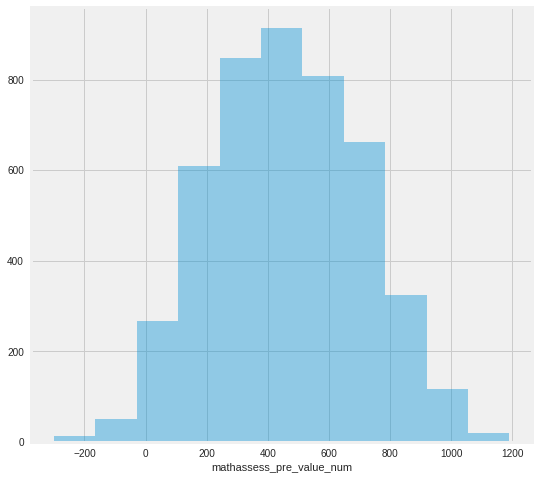

In [0]:
#@title Reviewing Histograms & Expectation {run: 'auto'}

#@markdown Fool around with the bin size, and pick one you like! Once you're happy [respond in the poll.](http://pollev.com/alexperusse670) 
col = 'mathassess_pre_value_num'

bins = 11 #@param {type:"slider", min:1, max:30, step:1}

f, ax = plt.subplots(figsize=(8, 8))
sns.distplot(data[col], bins=bins, hist=True, kde=False, rug=False, ax=ax)

#@markdown Given your histogram, [what do you believe is the expected value?](http://pollev.com/alexperusse670)

## Being a Little More Careful - Variance

So far we've been very cavalier about the term **variance**, really using to describe two distributions.  However, variance is actually as much a property (or *statistic*) as the expected value is, and we can calculate it directly.  Instead of being an average of the data.  It's *the average (square) distance of the data from its mean.*  So the larger the variance, the farther data will fall from its mean.  

Often, *particularly when our data is normally distributed* (bell shaped) then we also like to talk about a tightly related statistic, standard deviation. 

### Standard Deviation

Once we've calculated the variance, the standard deviation is very easy to get.  The **standard deviation** is equal to the square root of the variance. 

Standard deviation offers some convenience, because of it's connection to the normal distribution and how well it describes its shape. This relationship is usually shown with the following graph:

#### The Obligatory Graph
![Obligatory Graph](https://www.biologyforlife.com/uploads/2/2/3/9/22392738/sd2_orig.png)

### Confidence Intervals

Motivated by the picture above, we often like to have some shorthand to be able to describe the range of data.  Confidence intervals become very common to this end.  A 95% confidence interval will simply tell you the range between which 95% of the data falls.  Notice how 95% of the data is equivalent to 2 standard deviations.

So if I told you that students on average growth on the MI by 125 points and that the standard deviation of student growth was 50 points, [what is your 95% confidence interval for student growth on the MI?](https://pollev.com/alexperusse670)

Whereas it's common to talk about multiple of the standard deviation, like we did to define confidence intervals, with the variance we usually just talk about it by itself. 

Let's put this all in context. 

In [0]:
#@title Import Statistical and Visualization Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

The expected value of our sample is 81.76849703531838 and the standard deviation is 207.5
The variance of our sample is: 43036.2
Approximately 95% of our data falls between -333.1 and 496.7


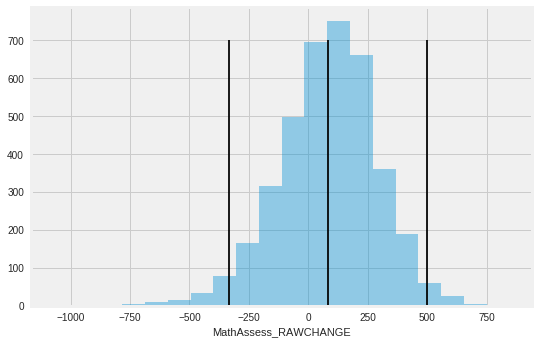

In [0]:
#@title Plot Math Growth & Calculate Some Statistics
math = data[data.MathAssess_RAWCHANGE.isna() == False]
sample = math['MathAssess_RAWCHANGE']
print(f"The expected value of our sample is {sample.mean():4} and the standard deviation is {sample.std():.4}")
print(f"The variance of our sample is: {sample.std()**2:.6}")
#ci = sm.stats.zconfint(sample)
l = sample.mean() - 2*sample.std()
r = sample.mean() + 2*sample.std()
print(f"Approximately 95% of our data falls between {l:.4} and {r:.4}")
sns.distplot(sample, bins=20, kde=False)
plt.vlines(x=[sample.mean(), l, r], ymin=0, ymax=700)
plt.show()

## Exploring the Joint Relationship Between Two Variables

Being able to describe a variable is a useful ability, and is an important initial step in exploring any data. However, the questions that cause us to try to analyze data in the first place are typically about the relationship between a pair of variables or multiple variables, such as the relationship between participating on a focus list and ELA outcomes. We'll spend today doing a deep dive into this question in the context where we want to compare a binary variable (are you a focus list or not) with a continuous one (how much will you grow on a assessment?)

### Visually Comparing Distributions

A great place is to leverage the skills we've already built as a starting point.  Let start by considering the focus list participation on assessment growth fo math.

In [0]:
#@title Prepare the data for analysis
math = data[data.MathAssess_RAWCHANGE.isna() == False]
X = math.OFFICIALFLMTH
y = math.MathAssess_RAWCHANGE
#describe_nulls(math)

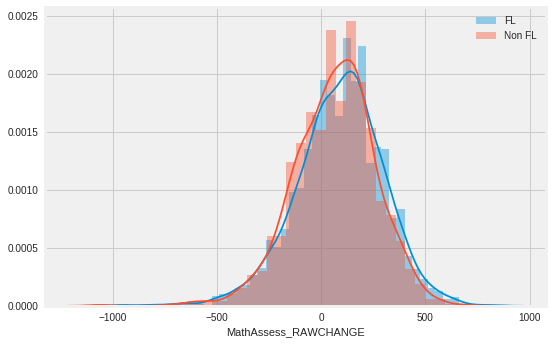

In [0]:
#@title Plot Focus List vs. Non Focus List Growth
#@markdown This plot shows the slightest hint that blue is to the right, but they overlap so well that it's hard to tell if that's significant at all.  

f, ax = plt.subplots()
sns.distplot(a=math[math.OFFICIALFLMTH == 1]['MathAssess_RAWCHANGE'], ax=ax, label='FL')
sns.distplot(a=math[math.OFFICIALFLMTH == 0]['MathAssess_RAWCHANGE'], ax=ax, label='Non FL')
plt.legend()
plt.show()




## Now Let's Calculate the Expected Value

Those distributions seem to overlap quite a bit, but let's actually calculate the expected value and see what the difference is.

In [0]:
#@markdown Calculating the mean with Python.
x1 = math[math.OFFICIALFLMTH == 1]['MathAssess_RAWCHANGE']
x2 = math[math.OFFICIALFLMTH == 0]['MathAssess_RAWCHANGE']
print(f"N Focus List Students: {x1.shape[0]}")
print(f"N Non Focus List Students: {x2.shape[0]}")
print(f"Focus list students averages {x1.mean():.4} points of growth")
print(f"and non focus list student averaged {x2.mean():.4} points of growth.")

N Focus List Students: 2757
N Non Focus List Students: 1122
Focus list students averages 88.8 points of growth
and non focus list student averaged 64.49 points of growth.


## Well, that's very interesting!  
Focus list students seem to be doing better by about 24 points.  We might naively stop there, but what would happen if we kept sampling students?  Would focus list students continue to outperform nonfocus list students on average, or would non focus list students catch up?

All these questions are sources of uncertainty! We really want to directly make inferences from that difference and publish the result to the world ("focus list students grow at 33% greater rate than their peers!"), but it's always wise to first consider how confident we can be in the result.  

### Statistical Tests as a First Step in Inference
Back in the day, statistical tests became an extremely popular way to do inference.  They were easy to calculate by hand and gave decisive answers about what you could consider "True" or not.  While there is a whole zoo of them, they all follow a general pattern.

 1. This is some property we want to assess, for example "do two samples have different means?"
 2. We calculate some statistics from the data (such as the expected value and variance).  
 3. We use a formula (the statistical test) on the statistics we calculated, and it returns one last statistic, usually called a p-value. 
 4. If that p-value is small enough, then we can conclue the result is "statistically signficant" and conclude something about are data (No they don't!).  If not, then we dont! Statistician like to call this step "rejecting (if the p-values is small) or accepting (if the p-value is large) the null hypothesis."  Traditionally in the social sciences, we have looked for p-values < 0.05. 
 
Statistical tests have a long history of use in science.  It is even today common pratice to restrict articles from being published in journals if they are not "statistically significant."  While simpler statistical tests have become less common, the use of p-values are still as commonplace as ever.  

## In our context

So we've been looking at the raw change in assessment, and trying to claim that focus list students do better.  The classic test for this is the **two sample t-test.**  We're going to demonstrate it here, but then immediatly show you a better way to do it.  This is just because the Ghost of Ronald Fischer bullied me into doing it. 


In [0]:
#@title The Two-Sample T-Test
x1 = math[math.OFFICIALFLMTH == 1]['MathAssess_RAWCHANGE']
x2 = math[math.OFFICIALFLMTH == 0]['MathAssess_RAWCHANGE']

results = sm.stats.ttest_ind(x1=x1, x2=x2, alternative="larger")
significant = "signficiant at alpha = 0.05" if results[1] < 0.05 else "not signficant at alpha = 0.05"
print(f"The two sample t test for FL and Non FL found that `FL > NFL` was {significant} with p-value: {results[1]:0.3}")

The two sample t test for FL and Non FL found that `FL > NFL` was signficiant at alpha = 0.05 with p-value: 0.000464


In [0]:
#@title Your Turn!
#@markdown Here's the output from the t-test. [Respond in the poll whether or not you think this result is "statistically significant".](http://pollev.com/alexperusse670)
#@title The Two-Sample T-Test

ela = data[data.LITASSESS_RAWCHANGE.isna() == False]
x1 = ela[ela.OFFICIALFLLIT == 1]['LITASSESS_RAWCHANGE']
x2 = ela[ela.OFFICIALFLLIT == 0]['LITASSESS_RAWCHANGE']
print(f"FL average ELA growth was {x1.mean()}, Non FL averaged {x2.mean()}")

results = sm.stats.ttest_ind(x1=x1, x2=x2)
significant = "signficiant at alpha = 0.05" if results[1] < 0.05 else "not signficant at alpha = 0.05"
print(f"The two sample t test for FL and Non FL found a of p-value: {results[1]:0.3}")

FL average ELA growth was 56.985753858330035, Non FL averaged 46.53846153846154
The two sample t test for FL and Non FL found a of p-value: 0.059


## So what's the problem...

### Our model makes a lot of assumptions about our data
If we think about the world from the t-test's perspective, the only information we give the t-test is whether or not the student was on a focus list, but in all other respects all students are exactly the same.  Is that really a good assumption? A t-test was really born for randomized experiments. The magic of randomization is that even though we know that our population is diversed, because a person with say some important genetic difference is just as likely to go to the treatment as the control group we can ignore that effect. However, focus list students are not randomly selected, and therefore the difference between FL and Non FL isn't just that they received services.  For example, it is very likely that Focus List students start with a lower assessment score relative to a non focus list student, and this may have some impact on the amount of growth they are expected to achieve in a year. 

### p-values are frequently misinterpreted
The problem starts with the definition (from wikipedia):

*In statistical hypothesis testing, the p-value or probability value or asymptotic significance is the probability for a given statistical model that, when the null hypothesis is true, the statistical summary (such as the sample mean difference between two compared groups) would be greater than or equal to the actual observed results.[1](https://en.wikipedia.org/wiki/P-value#cite_note-ASA-1)*

This confusing definition often leads to many people (including statisticians) arguing that the p-value tells you the strength of the evidence that your hypothesis is correct, **but this is not the case.** It is *the likelihood you would see this data* if there were actual effect in the data (e.g. the focus list students and non-focus list students grow at the same rate on average). This subtle point has led to decades of arguement, though one that I believe is much further along today than it was.  

### The Scientific Community is Moving Ahead
You don't just have to take my word that science is pushing back against p-values.  Hopefuly with movements such as [this comment in Nature ](https://www.nature.com/articles/d41586-019-00857-9?utm_source=fbk_nnc&utm_medium=social&utm_campaign=naturenews&sf209757610=1) that included a petition of ~900 statistician and professionals, this [issue of the American Statistician](https://www.tandfonline.com/toc/utas20/73/sup1) devoted to p-values and statistical significance, and pressure from outside academic community like [this article from Nate Silver](https://fivethirtyeight.com/features/statisticians-found-one-thing-they-can-agree-on-its-time-to-stop-misusing-p-values/) we can move past it. If you are interested in reading more about statistics with a nuanced point of view, [I really recommend Andrew Gelman's blog.](https://statmodeling.stat.columbia.edu)

Is the p-value a measure of how strong your evidence is? [Respond in the poll](http://pollev.com/alexperusse670)

## But what do we use instead?

We first have to use a slightly improved tool. Regression modeling!  The t-test we performed before can actually be thought of as a special case of what we will spend all of next session talking about. 

However to avoid confusion I should be clear.  Regression models don't (necessarily) get ditch p-values. In fact, the type of model we'll start with will happily give you a whole bunch of p-values for you to interpret. However, they will relax some of the assumptions we made about our data, and will allow to to include other pieces of information in our models of things like student growth.

Okay, quick example.

To begin, it's important to state the goal of regression.  We want to predict the value of some column of data, given some other data.  So far, the thing we've been trying to predict have been things like ELA and Math assessment growth, and we've wanted to be able to predict that given their participation on a focus list.  When we talk about this, we're often going to use a formula that looks like this. 
$$\text{Math Assessment Growth} \sim \text{Math Focus List}$$

We'll then give this formula and our data to Python to make our predictions. **Don't worry about all the values in the table.**  We will go through many of them in the next session, but for now I will draw your attention to the important values. 

In [0]:
#@title A Better Way: Regression
relationship = sm.GLS(endog=y, exog=sm.add_constant(X))
results = relationship.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             GLS Regression Results                             
================================================================================
Dep. Variable:     MathAssess_RAWCHANGE   R-squared:                       0.003
Model:                              GLS   Adj. R-squared:                  0.003
Method:                   Least Squares   F-statistic:                     10.98
Date:                  Thu, 04 Apr 2019   Prob (F-statistic):           0.000928
Time:                          18:53:14   Log-Likelihood:                -26192.
No. Observations:                  3879   AIC:                         5.239e+04
Df Residuals:                      3877   BIC:                         5.240e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            64.4875      6.185     10.426      0.000      52.361      76.614
OFFICIALFLMTH    24.3137      7.337      3.314      0.001       9.929      38.698
==============================================================================
Omnibus:                      197.118   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.465
Skew:                          -0.421   Prob(JB):                     9.50e-71
Kurtosis:                       4.134   Cond. No.                         3.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The line to pay attention to starts with **OFFICIALFLMTH** and looks like:

|  | **coef** | **std err** | **t** | **P>t** |  [0.025 | 0.975]
|---|---|---|---|---|---|
|**OFFICIALFLMTH**|24.3137	|7.337|	3.314|	0.001|	9.929	|38.698

**coef**: This is an expected value.  In this case, it's the expected effect of being on a focus list on the math assessment growth. 

**P>t**: This is p -value. That is, the probability that the effect size (the **coef**) observed is the result of chance in the data. 

**[0.025, 0.975]**: Is a 95% confidence interval on the effect size **OFFICIALFLMTH**. 


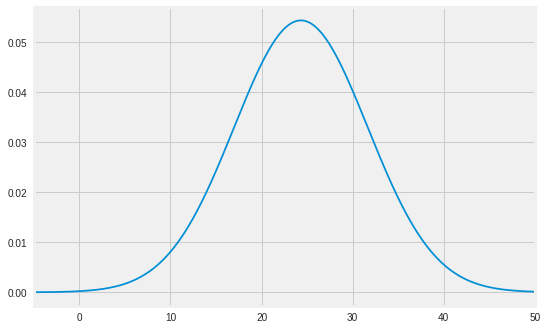

In [0]:
#@title Visually Interpreting the Regression
#@markdown It becomes much easier to see why we might want to consider this as "statistically significant" in light of this graph.  The distribution here is showings us different possible values for the effect size the their associated probability.  Notice how the probability that the effect size is larger than zero seems to be pretty large. 
import scipy

x = np.linspace(-5, 50, 1000)
# plug in the coef and std err values in as the loc (mean) and scale (std deviation) of the normal distribution
y = scipy.stats.norm.pdf(x, loc=24.3137, scale=7.337)


plt.xlim(-5, 50)
plt.plot(x, y)
plt.show()

# Thanks for Participating!

[Please leave me some feedback. It's appreciated :)](https://forms.office.com/Pages/ResponsePage.aspx?id=n4nHpSnR9kisiI-X82badMFC4tEHX8lCm8qe3Orb0kdUQkw2TkQxUFJEWjlCRElPVlJQWktVRlQ0QiQlQCN0PWcu) 

## Coming Up!

We are diving into one of the meatest topics in statistics, regression, and we will spend at least the next two sessions learning all about it. However I want to include your all data into this as well! So in addition to the normal *Practical Statistics* sessions every 3 weeks are so, we going to add in around two *Analyze It Live* sessions in about a month from now.  The general idea is that a participant from these sessions brings a dataset that you are interested in doing some regression on, and we will spend a two hours session doing a full analysis live (from exploratory analysis to inference and conclusions).  

These won't require any prep from me so I don't need to know now, but start to think about any data you might have that you would be comfortable going through in an *Analyze It Live* session. Please reach out to me directly if you have any ideas!